# `Sales Forecasting - KALBE`

Forecasts are statements about how the future will occur based on evidence or assumptions. In business, forecasting project often involves analyzing data, such as the performance history of a particular project. The purpose of forecasting is to give us insight into how likely it is that the project will be profitable in the future. We can choose to cancel the new project or stop the current project if the forecast is unfavorable.
In this cases, we would like to analyze sales history. I used 2 different forcasting model to get which one has the better result. The model was Holt Winters and ARIMA. Will predict / forcast the data up to 14 days ahead. The data is about the sales or the product that sold in the last 90 days. It contains 2 Category and 4 different product. Let's see if the sale is going to profitable or not in the future. 

# Introduction 

`Name : Aan Nurliyanah`

Hello, I'm Aan. I graduated from Hacktiv8 Data Science Bootcamp Batch 002 in December 2022. I have been a huge enthusiast yet been exploring the fields of Data Science and now seeking for new opportunities to challenge the confidence in my ability to perform as a Data Scientist due to my dedication and extensive education. During my studying period, I mastered the skills while still being eager to learn more.I believe my personality has also played a major role in my ability to succeed in this career. I am an extremely analytical, data-oriented, and calculated. 


# External Link

You can visit the deployment of the project via streamlit.app through this link:


https://nurliyanahaan-talent-fair-app-yr6z2u.streamlit.app/



# Working Area

### Import Library

In [ ]:
# using for calculation
import numpy as np
import pandas as pd
from math import sqrt

# using for visualization
import matplotlib.pylab as plt
%matplotlib inline


# using for model evaluation 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# using for visualization foreacsting
from statsmodels.tsa.seasonal import seasonal_decompose


# using for Modeling
!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing


import warnings
warnings.filterwarnings(action='ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data Loading and Overview

In [ ]:
dataA1 = pd.read_excel('kalbe_data.xlsx',sheet_name ='A1')
dataA2 = pd.read_excel('kalbe_data.xlsx',sheet_name ='A2')
dataB1 = pd.read_excel('kalbe_data.xlsx',sheet_name ='B1')
dataB2 = pd.read_excel('kalbe_data.xlsx',sheet_name ='B2')

Data details :

Dataset has 2 Category and 4 Product devide in 4 sheet in excel. The column details:

- **day**: contained information about day on sold product.
- **category**: contained information about product category. There are 2 categories used in this dataset, A and B.
- **product**: contained information about product name. There are 4 products used in this dataset, A1, A2 and B1, B2.
- **sales**: contained information about product sold.

#### Category A Product A1

In [ ]:
dataA1

,Day,Category,Product,Sales
0,1,A,A1,100.000000
1,2,A,A1,101.000000
2,3,A,A1,102.010000
3,4,A,A1,103.030100
4,5,A,A1,104.060401
...,...,...,...,...
85,86,A,A1,196.980000
86,87,A,A1,197.964900
87,88,A,A1,198.954724
88,89,A,A1,199.949498


Checking missing values

In [ ]:
dataA1.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

Checking duplicated data

In [ ]:
dataA1[dataA1.duplicated()].shape

(0, 4)

Checking detail info from the dataset

In [ ]:
dataA1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


Setting Day as index 

In [ ]:
new_dataA1= dataA1.set_index(['Day'])
new_dataA1

,Category,Product,Sales
Day,,,
1,A,A1,100.000000
2,A,A1,101.000000
3,A,A1,102.010000
4,A,A1,103.030100
5,A,A1,104.060401
...,...,...,...
86,A,A1,196.980000
87,A,A1,197.964900
88,A,A1,198.954724


Saving new data to deployment requirement.

In [ ]:
new_dataA1.to_csv('Data A1.csv')

Preview data

In [ ]:
new_dataA1.head(20)

,Category,Product,Sales
Day,,,
1,A,A1,100.000000
2,A,A1,101.000000
3,A,A1,102.010000
4,A,A1,103.030100
5,A,A1,104.060401
6,A,A1,105.101005
7,A,A1,113.000000
8,A,A1,106.000000
9,A,A1,107.060000


Plotting Sales 

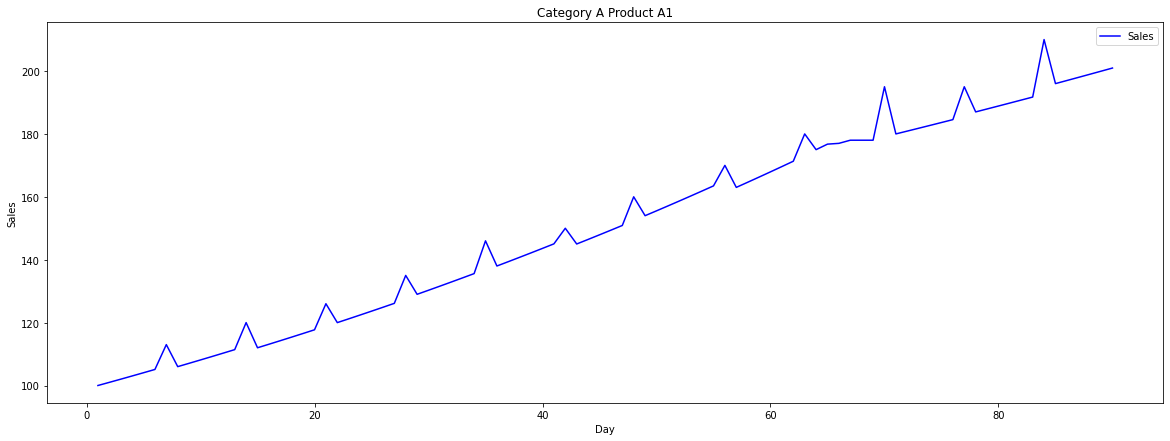

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(new_dataA1['Sales'], color='blue', label='Sales')
plt.title('Category A Product A1')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()

General Overview Category A Product A1 : 

- There is no missing value
- There is no duplicated data
- No need to do data cleaning 
- From the plot shows that the sales data is increased during the time. We will see the details in next section. 

#### Category A Product A2

In [ ]:
dataA2

,Day,Category,Product,Sales
0,1,A,A2,1000.000000
1,2,A,A2,1005.000000
2,3,A,A2,1010.025000
3,4,A,A2,1015.075125
4,5,A,A2,1020.150501
...,...,...,...,...
85,86,A,A2,1527.971484
86,87,A,A2,1535.611342
87,88,A,A2,1543.289398
88,89,A,A2,1551.005845


Checking missing value

In [ ]:
dataA2.isnull().sum()

Day         0
Category    0
Product     0
Sales       0
dtype: int64

Checking duplicated data

In [ ]:
dataA2[dataA2.duplicated()].shape

(0, 4)

Checking detail info from the dataset

In [ ]:
dataA2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


Setting Day as index

In [ ]:
new_dataA2= dataA2.set_index(['Day'])
new_dataA2

,Category,Product,Sales
Day,,,
1,A,A2,1000.000000
2,A,A2,1005.000000
3,A,A2,1010.025000
4,A,A2,1015.075125
5,A,A2,1020.150501
...,...,...,...
86,A,A2,1527.971484
87,A,A2,1535.611342
88,A,A2,1543.289398


Preview data 

In [ ]:
new_dataA2.head(20)

,Category,Product,Sales
Day,,,
1,A,A2,1000.000000
2,A,A2,1005.000000
3,A,A2,1010.025000
4,A,A2,1015.075125
5,A,A2,1020.150501
6,A,A2,1025.251253
7,A,A2,1075.377509
8,A,A2,1035.529397
9,A,A2,1040.707044


Saving new data to deployment requirement.

In [ ]:
new_dataA2.to_csv('Data A2.csv')

Plotting Sales

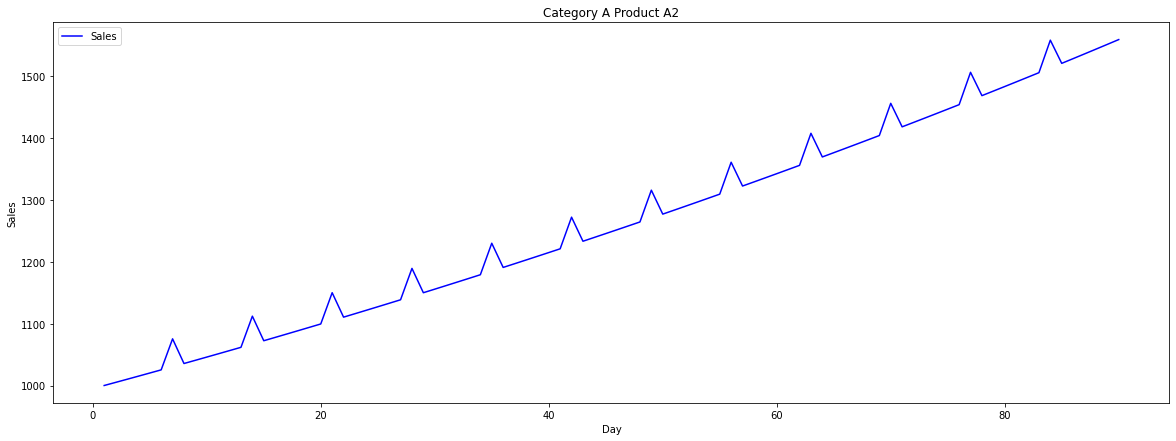

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(new_dataA2['Sales'], color='blue', label='Sales')
plt.title('Category A Product A2')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()

General Overview Category A Product A2 : 

- There is no missing value
- There is no duplicated data 
- No need to do data cleaning
- From the plot shows that the sales data is increased during the time. We will see the details in next section.

#### Category B Product B1

In [ ]:
dataB1

,Day,Category,Product,Sales,Event
0,1,B,B1,990.0,0
1,2,B,B1,980.0,0
2,3,B,B1,1010.0,0
3,4,B,B1,1010.0,0
4,5,B,B1,1000.0,0
...,...,...,...,...,...
99,100,B,B1,NaN,0
100,101,B,B1,NaN,1
101,102,B,B1,NaN,0
102,103,B,B1,NaN,0


Checking missing value

In [ ]:
dataB1.isnull().sum()

Day          0
Category     0
Product      0
Sales       14
Event        0
dtype: int64

Checking duplicated data

In [ ]:
dataB1[dataB1.duplicated()].shape

(0, 5)

Checking the detail information and type of data

In [ ]:
dataB1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     90 non-null     float64
 4   Event     104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


Setting Day as index

In [ ]:
new_dataB1= dataB1.set_index(['Day'])
new_dataB1

,Category,Product,Sales,Event
Day,,,,
1,B,B1,990.0,0
2,B,B1,980.0,0
3,B,B1,1010.0,0
4,B,B1,1010.0,0
5,B,B1,1000.0,0
...,...,...,...,...
100,B,B1,NaN,0
101,B,B1,NaN,1
102,B,B1,NaN,0


General Overview Category B Product B1 : 

- There are missing value with total 14 row, we will continue to data cleaning
- There is no duplicated data 
- We will drop column Event since not using in analysis

##### Data Cleaning B-B1

Drop Event coloumn 

In [ ]:
new_dataB1.drop(['Event'],axis=1, inplace=True)

Drop missing value 

In [ ]:
new_dataB1.dropna(axis=0,inplace=True)

Preview data

In [ ]:
new_dataB1

,Category,Product,Sales
Day,,,
1,B,B1,990.0
2,B,B1,980.0
3,B,B1,1010.0
4,B,B1,1010.0
5,B,B1,1000.0
...,...,...,...
86,B,B1,1010.0
87,B,B1,1020.0
88,B,B1,1455.0


Saving new data to deployment requirement.

In [ ]:
new_dataB1.to_csv('Data B1.csv')

Plotting Sales

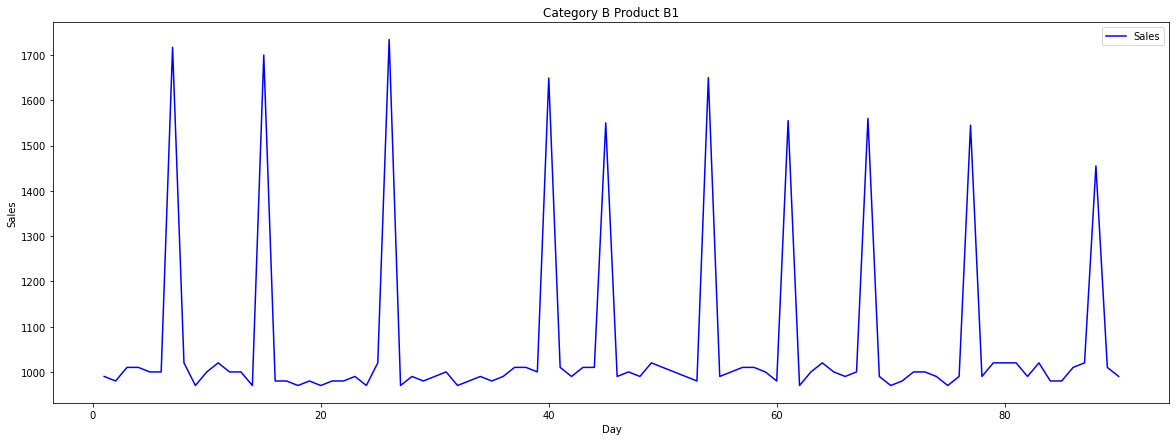

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(new_dataB1['Sales'], color='blue', label='Sales')
plt.title('Category B Product B1')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()

The plot shows that the sales data is quitely constant during the time but seems like any decreased. We will see the details in next section.

#### Category B Product B2

In [ ]:
dataB2

,Day,Category,Product,Sales
0,1,B,B2,NaN
1,2,B,B2,NaN
2,3,B,B2,NaN
3,4,B,B2,NaN
4,5,B,B2,NaN
...,...,...,...,...
99,100,B,B2,NaN
100,101,B,B2,NaN
101,102,B,B2,NaN
102,103,B,B2,NaN


Checking missing value

In [ ]:
dataB2.isnull().sum()

Day          0
Category     0
Product      0
Sales       74
dtype: int64

Checking duplicated data

In [ ]:
dataB2[dataB2.duplicated()].shape

(0, 4)

Checking detaied info of the data 

In [ ]:
dataB2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     30 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


General overview from Category B Product B2: 

- there are missing values total 74 in sales column 
- there is no duplicated data 
- we will do data cleaning in next section 

##### Data Cleaning B-B2

Setting Day as index

In [ ]:
new_dataB2= dataB2.set_index(['Day'])
new_dataB2

,Category,Product,Sales
Day,,,
1,B,B2,NaN
2,B,B2,NaN
3,B,B2,NaN
4,B,B2,NaN
5,B,B2,NaN
...,...,...,...
100,B,B2,NaN
101,B,B2,NaN
102,B,B2,NaN


Drop missing values

In [ ]:
new_dataB2.dropna(axis=0,inplace=True)

In [ ]:
new_dataB2

,Category,Product,Sales
Day,,,
61,B,B2,10.000000
62,B,B2,20.000000
63,B,B2,40.000000
64,B,B2,80.000000
65,B,B2,144.000000
66,B,B2,259.200000
67,B,B2,300.000000
68,B,B2,450.000000
69,B,B2,560.000000


Saving new data for deployment requirements

In [ ]:
new_dataB2.to_csv('Data B2.csv')

Plotting Sales

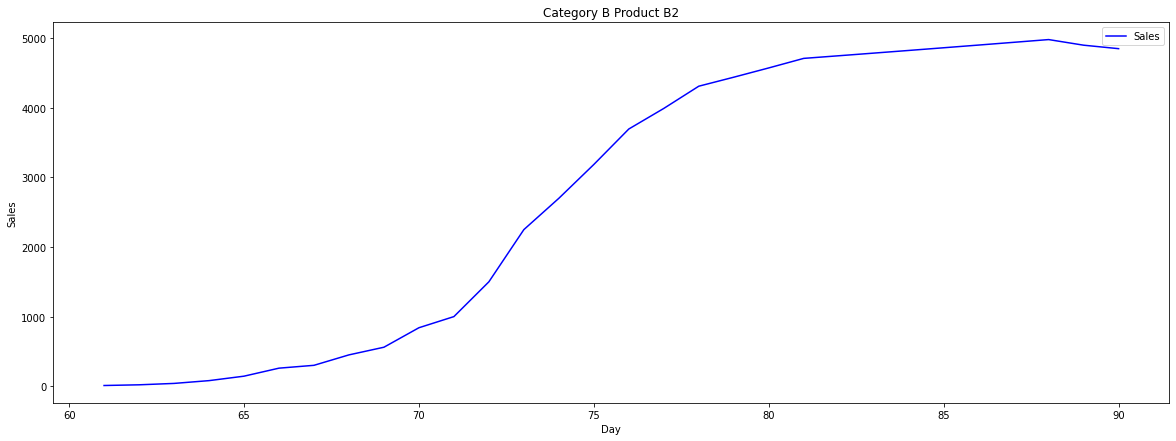

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(new_dataB2['Sales'], color='blue', label='Sales')
plt.title('Category B Product B2')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()

The plot shows that the sales data seems like increased over the time. 

## Time Series Decomposition

In order to analyse the time series data, we have to look at the components or in other word, we decompose the components from the time series. There are two models that describe a time series, which are additive and multiplicative model. A rule of thumb for selecting the right model is to see in our plot if the trend and seasonal variation are relatively constant over time, in other words, linear. If yes, then we will select the Additive model. Otherwise, if the trend and seasonal variation increase or decrease over time then we use the Multiplicative model.

We try to look at the data in weekly period, since the data are in day period, we aggregate it into 7 period

### Additive

<Figure size 1152x648 with 0 Axes>

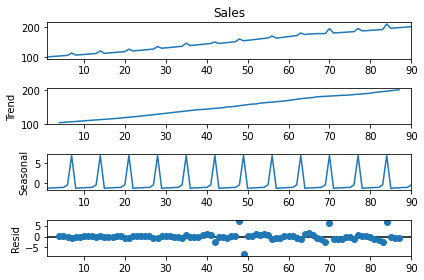

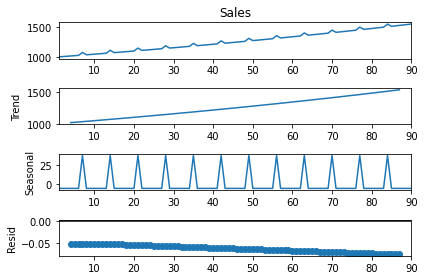

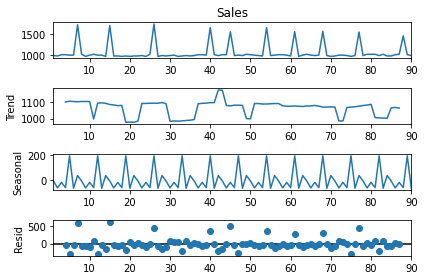

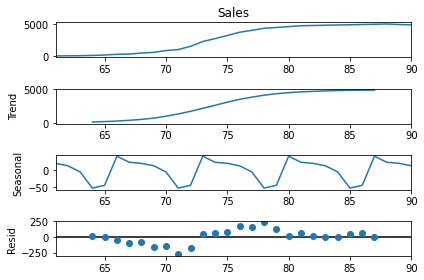

In [ ]:
# checking additive 
fig = plt.figure() 
fig.set_size_inches(16, 9)

result_A1 = seasonal_decompose(new_dataA1['Sales'], period=7)
result_A2 = seasonal_decompose(new_dataA2['Sales'], period=7)
result_B1 = seasonal_decompose(new_dataB1['Sales'], period=7)
result_B2 = seasonal_decompose(new_dataB2['Sales'], period=7)

fig = result_A1.plot() 
fig = result_A2.plot() 
fig = result_B1.plot() 
fig = result_B2.plot() 

According to the decomposition result above, the trend is linear and the seasonal doesn't change over the time, in other words constant. However, the residual is unstable and huge enough. Therefore, this data is not suitable to the additive model and we will perform the multiplicative modelling.

### Multiplicative

<Figure size 1152x648 with 0 Axes>

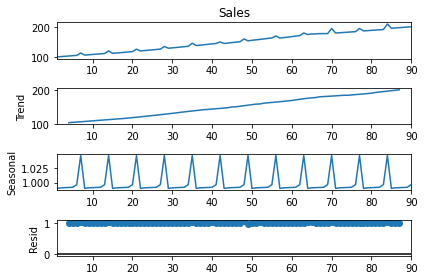

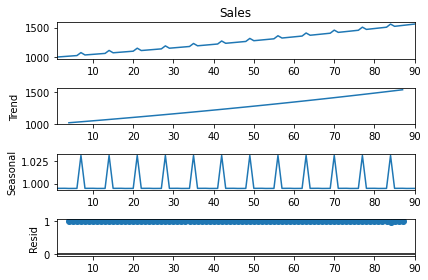

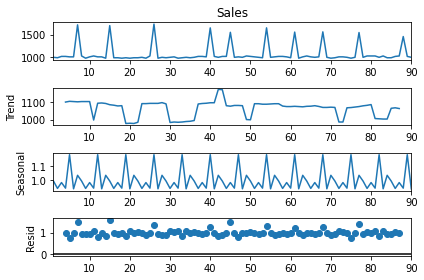

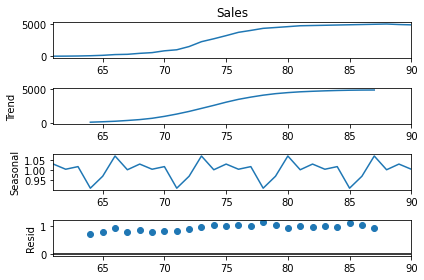

In [ ]:
# checking multiplicative
fig = plt.figure() 
fig.set_size_inches(16, 9)

result_A1 = seasonal_decompose(new_dataA1['Sales'], period=7,model= 'multiplicative')
result_A2 = seasonal_decompose(new_dataA2['Sales'], period=7,model= 'multiplicative')
result_B1 = seasonal_decompose(new_dataB1['Sales'], period=7,model= 'multiplicative')
result_B2 = seasonal_decompose(new_dataB2['Sales'], period=7,model= 'multiplicative')

fig = result_A1.plot() 
fig = result_A2.plot() 
fig = result_B1.plot() 
fig = result_B2.plot() 

According to the decomposition result above, the residual is not huge as the previous one, so the multiplicative data is make sense for this case. We will see at the next section.

## Spliting data into Train and Test

We will split the train 90 % and the test 10 % for all categories. 

### A-A1

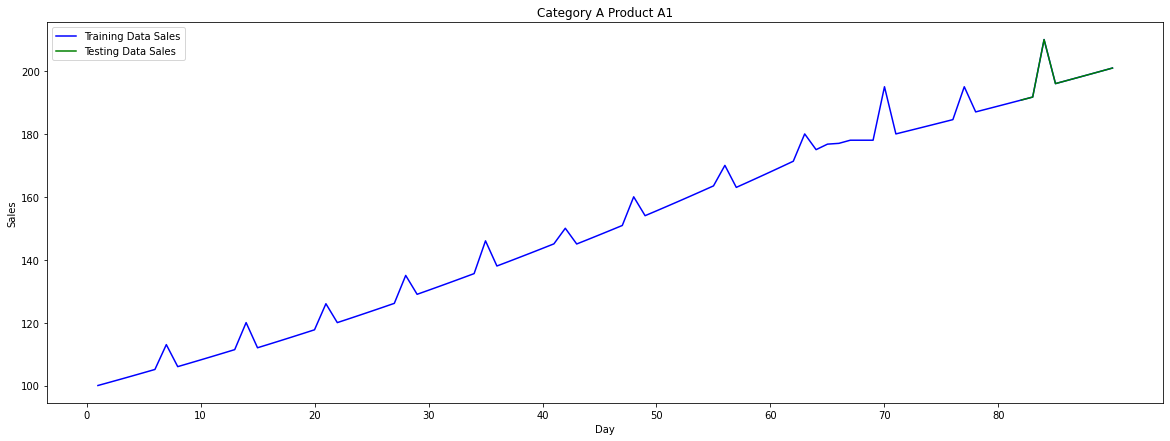

In [ ]:
trainA1, testA1 = new_dataA1[0:int(len(new_dataA1)*0.9)], new_dataA1[int(len(new_dataA1)*0.9):]

plt.figure(figsize=(20,7))
plt.title('Category A Product A1')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.plot(new_dataA1['Sales'], 'blue', label='Training Data Sales')
plt.plot(testA1['Sales'], 'green', label='Testing Data Sales')
plt.xticks(np.arange(0,89,10))
plt.legend()

#### Stationary

If the data is non-stationary : 


- Statistical properties of a non-stationary time series is a function of time where it is observed.
- Mean, variance and other statistics of a non-stationary time series changes with time. Hence, the conclusions from the analysis of a non-stationary series might be misleading.
- A non-stationary time series does not revert to the long term mean.
- Presence of trends, seasonality makes a series non-stationary.

If the data is stationary : 

- Statistical properties of a stationary time series are independent of the point in time where it is observed.
- Mean, variance and other statistics of a stationary time series remains constant. Hence, the conclusions from the analysis of stationary series is reliable.
- A stationary time series always reverts to the long-term mean.
- A stationary time series will not have trends, seasonality, etc.

Let's check the data is stationary or not 

In [ ]:
def check_stationarity(series):
    result = adfuller(series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
check_stationarity(trainA1['Sales'])

ADF Statistic: -0.381984
p-value: 0.913064
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
Non-stationary


A-A1 : The result is non-stationary.

### A-A2

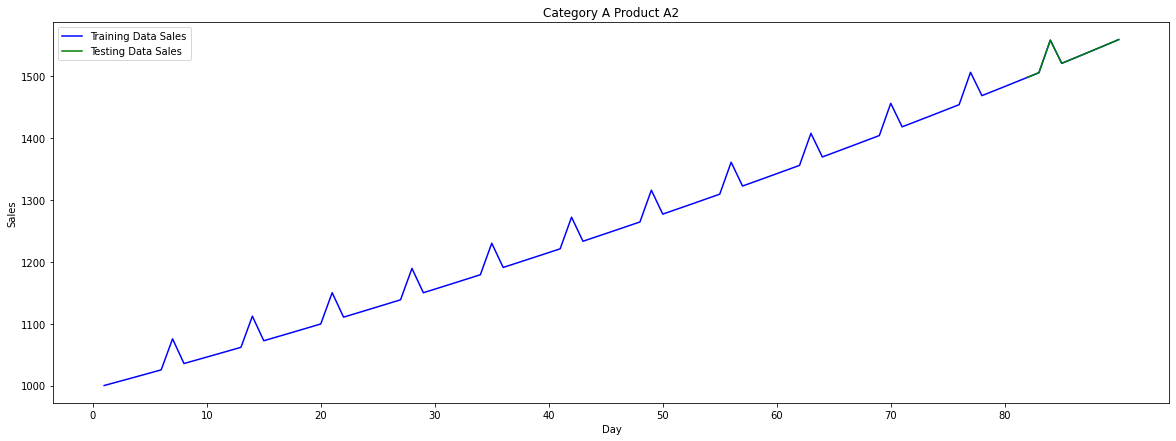

In [ ]:
trainA2, testA2 = new_dataA2[0:int(len(new_dataA2)*0.9)], new_dataA2[int(len(new_dataA2)*0.9):]

plt.figure(figsize=(20,7))
plt.title('Category A Product A2')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.plot(new_dataA2['Sales'], 'blue', label='Training Data Sales')
plt.plot(testA2['Sales'], 'green', label='Testing Data Sales')
plt.xticks(np.arange(0,89,10))
plt.legend()

#### Stationary 


Let's check the data is stationary or not

In [ ]:
check_stationarity(trainA2['Sales'])

ADF Statistic: 153633789009409.312500
p-value: 1.000000
Critical Values:
	1%: -3.523
	5%: -2.902
	10%: -2.588
Non-stationary


The result is non-stationary.

### B-B1

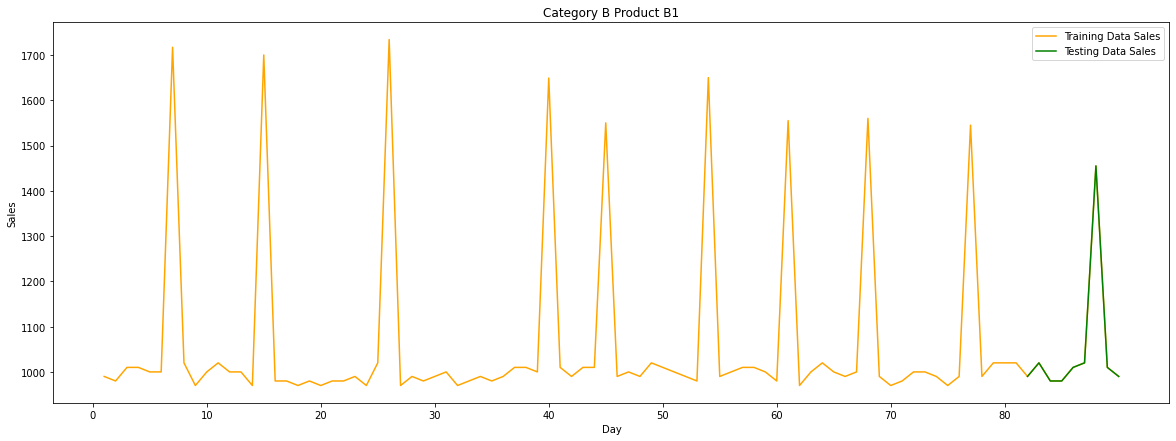

In [ ]:
trainB1, testB1 = new_dataB1[0:int(len(new_dataB1)*0.9)], new_dataB1[int(len(new_dataB1)*0.9):]

plt.figure(figsize=(20,7))
plt.title('Category B Product B1')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.plot(new_dataB1['Sales'], 'orange', label='Training Data Sales')
plt.plot(testB1['Sales'], 'green', label='Testing Data Sales')
plt.xticks(np.arange(0,89,10))
plt.legend()

#### Stationary

In [ ]:
check_stationarity(trainB1['Sales'])

ADF Statistic: -10.042487
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586
Stationary


The result is stationary, this is different from the product result before. if the data is stationary, the statistical properties of a system do not change over time. This doesn't mean that the values ​​for each data point have to be the same, but that the overall behavior of the data remains constant.

### B-B2

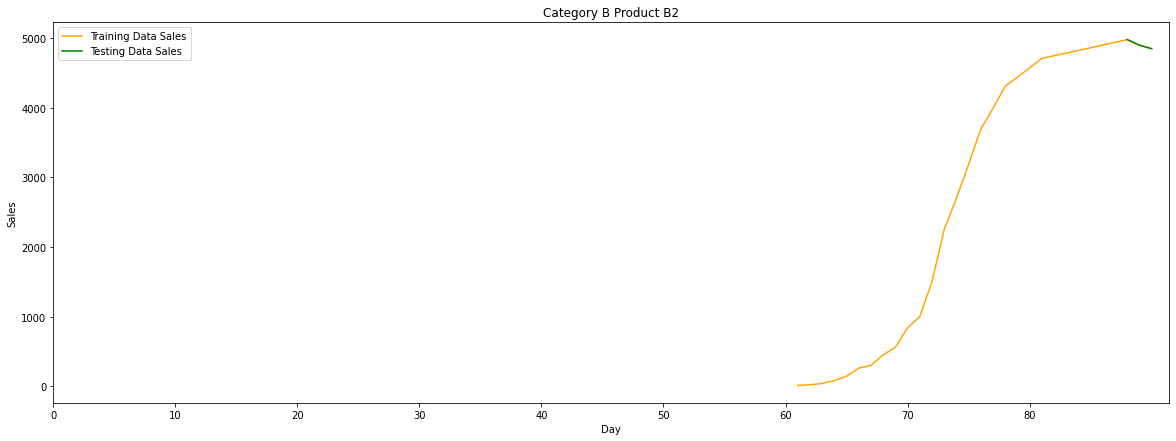

In [ ]:
trainB2, testB2 = new_dataB2[0:int(len(new_dataB2)*0.9)], new_dataB2[int(len(new_dataB2)*0.9):]

plt.figure(figsize=(20,7))
plt.title('Category B Product B2')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.plot(new_dataB2['Sales'], 'orange', label='Training Data Sales')
plt.plot(testB2['Sales'], 'green', label='Testing Data Sales')
plt.xticks(np.arange(0,89,10))
plt.legend()

#### Stationary 

In [ ]:
check_stationarity(trainB2['Sales'])

ADF Statistic: -1.357534
p-value: 0.602457
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
Non-stationary


The result is non stationary 

General overview from the stationary result:

- A-A1, A-A2 , B-B2 are non stationary
- B-B1 is stationary

## Modeling

There are 2 models that I used in this cases, such as :

1. HOLT WINTERS
2. ARIMA

### HOLT - WINTERS

Holt winter’s method is one of the many time series prediction methods which can be used for forecasting. Holt Winter’s time series model is a very powerful prediction algorithm despite being one of the simplest models. It can handle the seasonality in the data set by just calculating the central value and then adding or multiplying it to the slope and seasonality.

#### A-A1

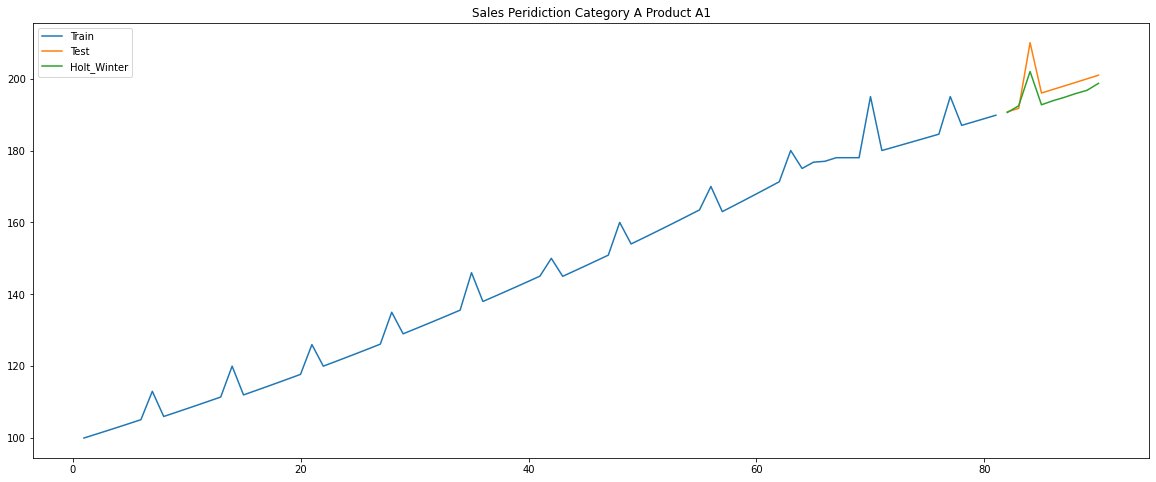

In [ ]:
y_hat_avg = testA1.copy()
fit1 = ExponentialSmoothing(np.asarray(trainA1['Sales']) ,seasonal_periods=7 ,trend='multiplicative', seasonal='multiplicative',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(testA1))
plt.figure(figsize=(20,8))
plt.plot( trainA1['Sales'], label='Train')
plt.plot(testA1['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Sales Peridiction Category A Product A1')
plt.legend(loc='best')
plt.show()

In [ ]:
print("MAE :", mean_absolute_error(testA1.Sales, y_hat_avg.Holt_Winter))
print("RMSE :", sqrt(mean_squared_error(testA1.Sales, y_hat_avg.Holt_Winter)))

MAE : 3.0091526988307495
RMSE : 3.658238782629337


In [ ]:
train_A1 = trainA1['Sales'].values
test_A1 = testA1['Sales'].values

actual_A1=pd.DataFrame()
actual_A1=pd.DataFrame(test_A1,columns=["Actual_A1"])
predicted_A1=pd.DataFrame(list(y_hat_avg['Holt_Winter']),columns=["Predicted_A1"])
actual_A1=actual_A1.reset_index(drop=True)
predicted_A1=predicted_A1.reset_index(drop=True)
output_A1=pd.concat([actual_A1,predicted_A1],axis=1)
output_A1

,Actual_A1,Predicted_A1
0,190.768144,190.571459
1,191.721984,192.434450
2,210.000000,201.985188
3,196.000000,192.725823
4,196.980000,193.846449
5,197.964900,194.786173
6,198.954724,195.842109
7,199.949498,196.757967
8,200.949246,198.681436


#### A-A2

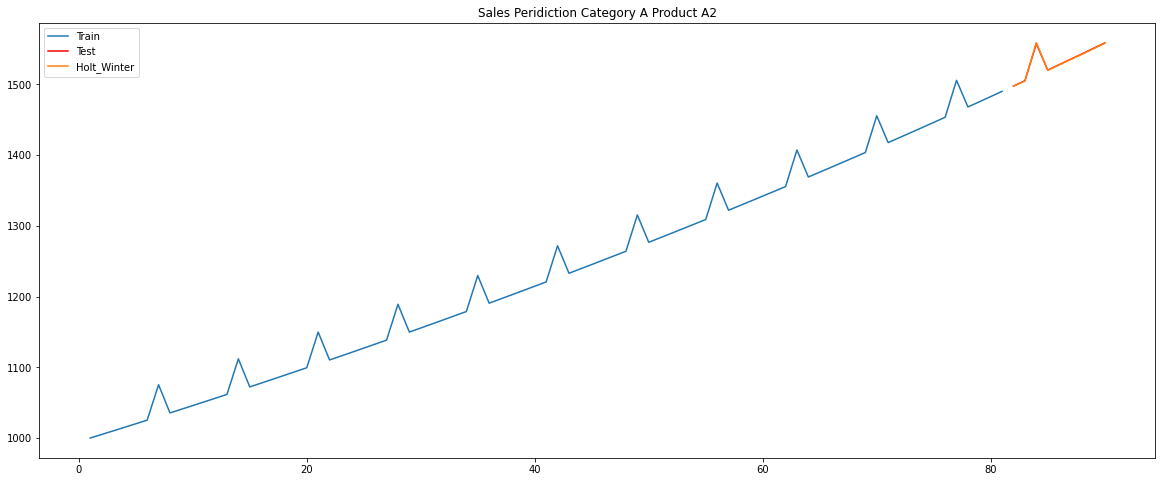

In [ ]:
y_hat_avg2 = testA2.copy()
fit2 = ExponentialSmoothing(np.asarray(trainA2['Sales']) ,seasonal_periods=7 ,trend='multiplicative', seasonal='multiplicative',).fit()
y_hat_avg2['Holt_Winter'] = fit2.forecast(len(testA2))
plt.figure(figsize=(20,8))
plt.plot( trainA2['Sales'], label='Train')
plt.plot(testA2['Sales'], label='Test', color='red')
plt.plot(y_hat_avg2['Holt_Winter'], label='Holt_Winter')
plt.title('Sales Peridiction Category A Product A2')
plt.legend(loc='best')
plt.show()

In [ ]:
print("MAE :", mean_absolute_error(testA2.Sales, y_hat_avg2.Holt_Winter))
print("RMSE :", sqrt(mean_squared_error(testA2.Sales, y_hat_avg2.Holt_Winter)))

MAE : 0.4781084513517726
RMSE : 0.5781508668601352


In [ ]:
train_A2 = trainA2['Sales'].values
test_A2 = testA2['Sales'].values

actual_A2=pd.DataFrame()
actual_A2=pd.DataFrame(test_A2,columns=["Actual_A2"])
predicted_A2=pd.DataFrame(list(y_hat_avg2['Holt_Winter']),columns=["Predicted_A2"])
actual_A2=actual_A2.reset_index(drop=True)
predicted_A2=predicted_A2.reset_index(drop=True)
output_A2=pd.concat([actual_A2,predicted_A2],axis=1)
output_A2

,Actual_A2,Predicted_A2
0,1497.790261,1497.526106
1,1505.279212,1505.013737
2,1557.805608,1559.129410
3,1520.369636,1520.101500
4,1527.971484,1527.702007
5,1535.611342,1535.340517
6,1543.289398,1542.745089
7,1551.005845,1550.458814
8,1558.760875,1558.211109


#### B-B1

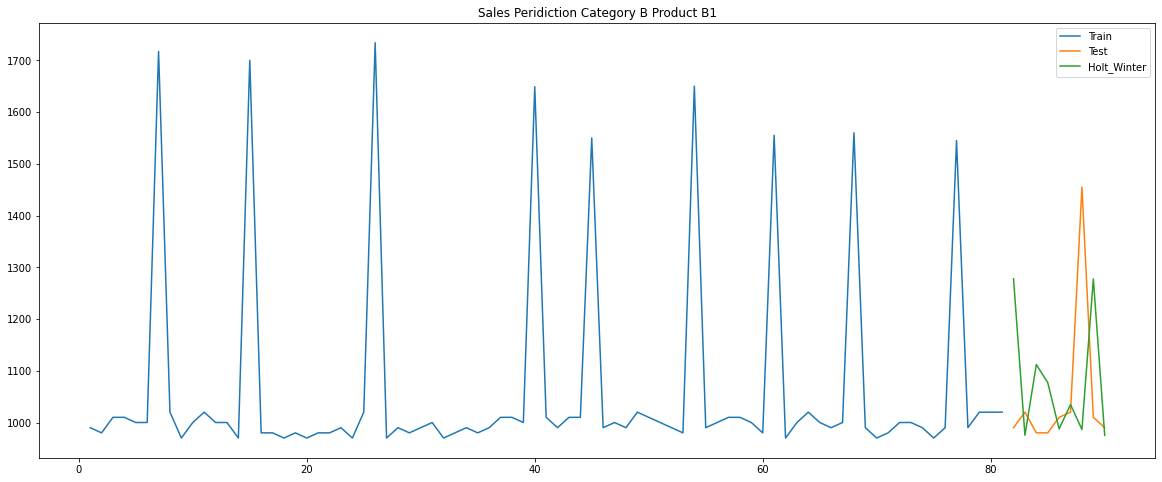

In [ ]:
y_hat_avg3 = testB1.copy()
fit3 = ExponentialSmoothing(np.asarray(trainB1['Sales']) ,seasonal_periods=7 ,trend='multiplicative', seasonal='multiplicative',).fit()
y_hat_avg3['Holt_Winter'] = fit3.forecast(len(testB1))
plt.figure(figsize=(20,8))
plt.plot( trainB1['Sales'], label='Train')
plt.plot(testB1['Sales'], label='Test')
plt.plot(y_hat_avg3['Holt_Winter'], label='Holt_Winter')
plt.title('Sales Peridiction Category B Product B1')
plt.legend(loc='best')
plt.show()

In [ ]:
print("MAE :", mean_absolute_error(testB1.Sales, y_hat_avg3.Holt_Winter))
print("RMSE :", sqrt(mean_squared_error(testB1.Sales, y_hat_avg3.Holt_Winter)))

MAE : 149.9545294490698
RMSE : 211.7581630185158


In [ ]:
train_B1 = trainB1['Sales'].values
test_B1 = testB1['Sales'].values

actual_B1=pd.DataFrame()
actual_B1=pd.DataFrame(test_B1,columns=["Actual_B1"])
predicted_B1=pd.DataFrame(list(y_hat_avg3['Holt_Winter']),columns=["Predicted_B1"])
actual_B1=actual_B1.reset_index(drop=True)
predicted_B1=predicted_B1.reset_index(drop=True)
output_B1=pd.concat([actual_B1,predicted_B1],axis=1)
output_B1

,Actual_B1,Predicted_B1
0,990.0,1277.716355
1,1020.0,975.301034
2,980.0,1111.953443
3,980.0,1077.193452
4,1010.0,987.535300
5,1020.0,1034.708337
6,1455.0,986.471356
7,1010.0,1277.342635
8,990.0,975.015767


#### B-B2

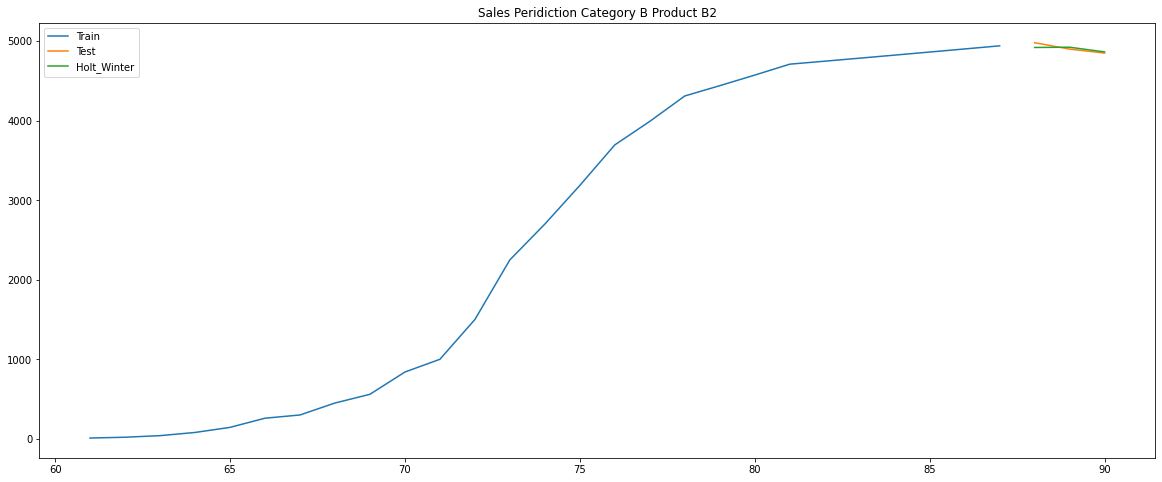

In [ ]:
y_hat_avg4 = testB2.copy()
fit4 = ExponentialSmoothing(np.asarray(trainB2['Sales']) ,seasonal_periods=7 ,trend='additive', seasonal='additive',).fit()
y_hat_avg4['Holt_Winter'] = fit4.forecast(len(testB2))
plt.figure(figsize=(20,8))
plt.plot( trainB2['Sales'], label='Train')
plt.plot(testB2['Sales'], label='Test')
plt.plot(y_hat_avg4['Holt_Winter'], label='Holt_Winter')
plt.title('Sales Peridiction Category B Product B2')
plt.legend(loc='best')
plt.show()

In [ ]:
print("MAE :", mean_absolute_error(testB2.Sales, y_hat_avg4.Holt_Winter))
print("RMSE :", sqrt(mean_squared_error(testB2.Sales, y_hat_avg4.Holt_Winter)))

MAE : 32.78922762699555
RMSE : 38.22878764064219


In [ ]:
# convert the result into dataframe 
train_B2 = trainB2['Sales'].values
test_B2 = testB2['Sales'].values

actual_B2=pd.DataFrame()
actual_B2=pd.DataFrame(test_B2,columns=["Actual_B2"])
predicted_B2=pd.DataFrame(list(y_hat_avg4['Holt_Winter']),columns=["Predicted_B2"])
actual_B2=actual_B2.reset_index(drop=True)
predicted_B2=predicted_B2.reset_index(drop=True)
output_B2=pd.concat([actual_B2,predicted_B2],axis=1)
output_B2

,Actual_B2,Predicted_B2
0,4980.657414,4920.585376
1,4900.000000,4923.751769
2,4850.000000,4864.543876


### ARIMA

Autoregressive Integrated Moving Average (ARIMA) is the common used algorithm. ARIMA models are a general class of models used for forecasting time series data. ARIMA models are generally denoted as ARIMA (p,d,q)  where p is the order of autoregressive model, d is the degree of differencing, and q is the order of moving-average model. ARIMA models use differencing to convert a non-stationary time series into a stationary one, and then predict future values from historical data. These models use auto correlations and moving averages over residual errors in the data to forecast future values. Performs well on short term forecasts. In this case we will use for forecast 14 days ahead. And its prefer for non-stationary time series.

#### A-A1

I will use Auto ARIMA, its automatically generates the optimal parameter values (p,d, and q). The generated values are the best, and the model will give accurate forecast results. Auto ARIMA simplifies the process of building a time series model using the ARIMA model.

In [ ]:
modelA1 = auto_arima(new_dataA1['Sales'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=579.170, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=534.583, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.48 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=557.876, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=534.235, Time=0.38 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=532.849, Time=0.69 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=526.653, Time=1.02 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=525.473, Time=1.51 sec
 ARIMA(1,1,0)(5,1,1)[4]             : AIC=inf, Time=4.26 sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=inf, Time=2.26 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=542.640, Time=0.67 sec
 ARIMA(2,1,0)(5,1,0)[4]             : AIC=516.562, Time=1.43 sec
 ARIMA(2,1,0)(4,1,0)[4]             : AIC=515.490, Time=0.88 sec
 ARIMA(2,1,0)(3,1,0)[4]             : AIC=519.813, Time=0.52 sec
 ARIMA(2,1,0)(4,1,1)[4]             : AIC=inf, Time=4.75 se

In [ ]:
# Applying auto arima result into the ARIMA model 

train_A1 = trainA1['Sales'].values
test_A1 = testA1['Sales'].values

history_A1 = [x for x in train_A1]
print(type(history_A1))
predictions_A1 = list()
for t in range(len(test_A1)):
    model_A1 = ARIMA(history_A1, order=(3,1,0))
    model_A1_fit = model_A1.fit()
    output = model_A1_fit.forecast()
    yhat = output[0]
    predictions_A1.append(yhat)
    obs = test_A1[t]
    history_A1.append(obs)

<class 'list'>


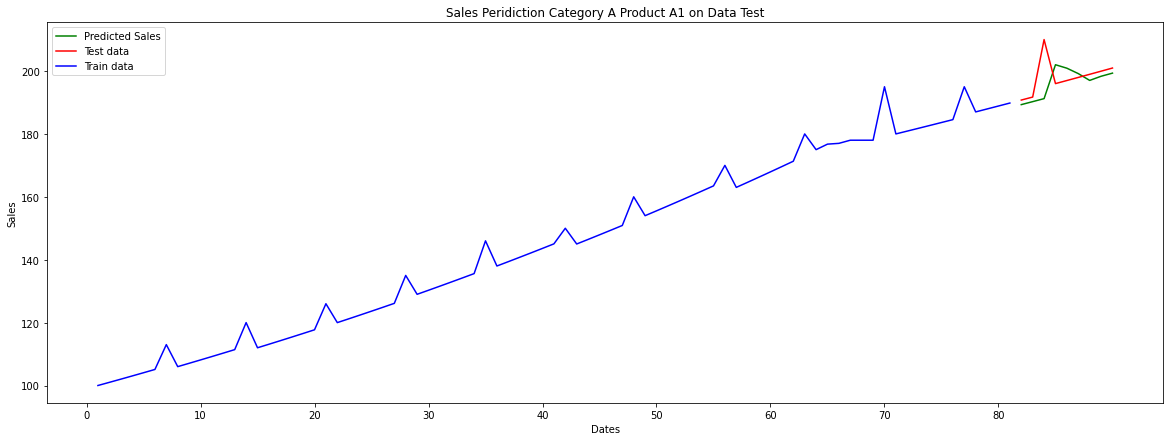

In [ ]:
# ploting the result
plt.figure(figsize=(20,7))

plt.plot(testA1.index, predictions_A1, color='green', label='Predicted Sales')
plt.plot(testA1.index, testA1["Sales"], color='red', label='Test data')
plt.plot(trainA1.index, trainA1["Sales"], color='blue', label='Train data')
plt.title('Sales Peridiction Category A Product A1 on Data Test')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.xticks(np.arange(0,89,10))
plt.legend()

In [ ]:
# Convert the result into dataframe

actual_A1=pd.DataFrame()
actual_A1=pd.DataFrame(test_A1,columns=["Actual_A1"])
predicted_A1=pd.DataFrame(list(predictions_A1),columns=["Predicted_A1"])
actual_A1=actual_A1.reset_index(drop=True)
predicted_A1=predicted_A1.reset_index(drop=True)
output_A1=pd.concat([actual_A1,predicted_A1],axis=1)
output_A1

,Actual_A1,Predicted_A1
0,190.768144,189.314107
1,191.721984,190.265294
2,210.000000,191.221291
3,196.000000,201.997256
4,196.980000,200.898458
5,197.964900,199.180549
6,198.954724,197.017807
7,199.949498,198.332020
8,200.949246,199.328231


#### A-A2

In [ ]:
# auto arima
modelA2 = auto_arima(new_dataA2['Sales'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=841.780, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=802.421, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=819.613, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=801.737, Time=0.12 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=799.881, Time=0.17 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=787.228, Time=0.50 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=784.413, Time=0.86 sec
 ARIMA(1,1,0)(5,1,1)[4]             : AIC=inf, Time=nan sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=inf, Time=3.22 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=789.777, Time=0.68 sec
 ARIMA(2,1,0)(5,1,0)[4]             : AIC=inf, Time=1.93 sec
 ARIMA(1,1,1)(5,1,0)[4]             : AIC=731.434, Time=1.44 sec
 ARIMA(1,1,1)(4,1,0)[4]             : AIC=729.795, Time=0.82 sec
 ARIMA(1,1,1)(3,1,0)[4]             : AIC=761.982, Time=0.60 sec

In [ ]:
#applying auto arima result into the ARIMA model
train_A2 = trainA2['Sales'].values
test_A2 = testA2['Sales'].values

history_A2 = [x for x in train_A2]
print(type(history_A2))
predictions_A2 = list()
for t in range(len(test_A2)):
    model_A2 = ARIMA(history_A2, order=(1,1,1))
    model_A2_fit = model_A2.fit()
    output = model_A2_fit.forecast()
    yhat = output[0]
    predictions_A2.append(yhat)
    obs = test_A2[t]
    history_A2.append(obs)

<class 'list'>


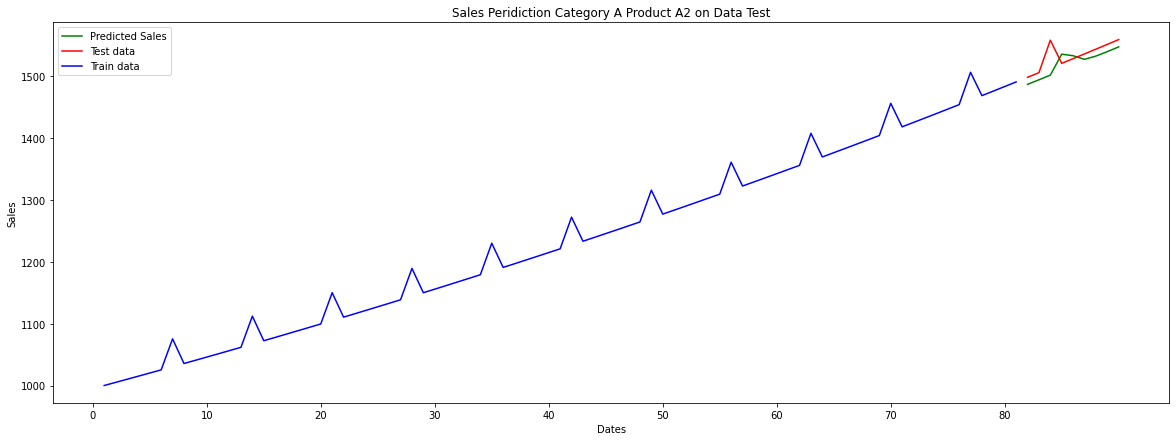

In [ ]:
# plotting the result
plt.figure(figsize=(20,7))

plt.plot(testA2.index, predictions_A2, color='green', label='Predicted Sales')
plt.plot(testA2.index, testA2["Sales"], color='red', label='Test data')
plt.plot(trainA2.index, trainA2["Sales"], color='blue', label='Train data')
plt.title('Sales Peridiction Category A Product A2 on Data Test')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.xticks(np.arange(0,89,10))
plt.legend()

In [ ]:
# Convert the result into dataframe

actual_A2=pd.DataFrame()
actual_A2=pd.DataFrame(test_A2,columns=["Actual_A2"])
predicted_A2=pd.DataFrame(list(predictions_A2),columns=["Predicted_A2"])
actual_A2=actual_A2.reset_index(drop=True)
predicted_A2=predicted_A2.reset_index(drop=True)
output_A2=pd.concat([actual_A2,predicted_A2],axis=1)
output_A2

,Actual_A2,Predicted_A2
0,1497.790261,1486.413479
1,1505.279212,1493.792507
2,1557.805608,1501.295049
3,1520.369636,1535.201313
4,1527.971484,1532.672982
5,1535.611342,1526.828151
6,1543.289398,1532.078746
7,1551.005845,1539.313254
8,1558.760875,1546.970588


#### B-B1

In [ ]:
# auto arima
modelB1 = auto_arima(new_dataB1['Sales'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=1273.418, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=1222.176, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=1247.473, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=1221.772, Time=0.13 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=1212.923, Time=0.22 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=1211.265, Time=0.43 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=1212.327, Time=0.50 sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=1208.436, Time=0.79 sec
 ARIMA(1,1,0)(3,1,1)[4]             : AIC=1206.547, Time=0.51 sec
 ARIMA(1,1,0)(2,1,1)[4]             : AIC=1208.399, Time=0.61 sec
 ARIMA(1,1,0)(3,1,2)[4]             : AIC=inf, Time=1.46 sec
 ARIMA(1,1,0)(2,1,2)[4]             : AIC=1210.309, Time=1.35 sec
 ARIMA(1,1,0)(4,1,2)[4]             : AIC=inf, Time=1.77 sec
 ARIMA(0,1,0)(3,1,1)[4]             : AIC=1231.4

In [ ]:
## applying the result of auto arima into Arima model

train_B1 = trainB1['Sales'].values
test_B1 = testB1['Sales'].values

history_B1 = [x for x in train_B1]
print(type(history_B1))
predictions_B1 = list()
for t in range(len(test_B1)):
    model_B1 = ARIMA(history_B1, order=(2,1,0))
    model_B1_fit = model_B1.fit()
    output = model_B1_fit.forecast()
    yhat = output[0]
    predictions_B1.append(yhat)
    obs = test_B1[t]
    history_B1.append(obs)

<class 'list'>


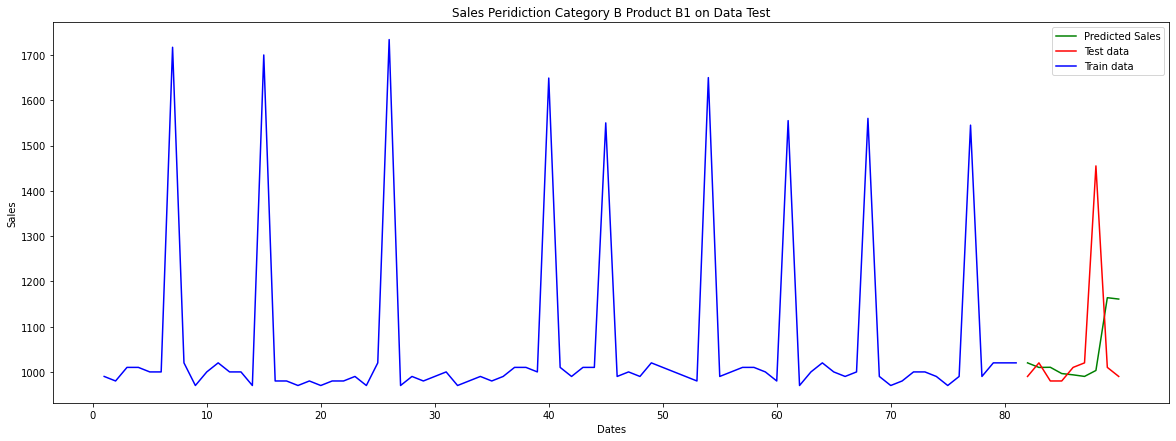

In [ ]:
# plotting the result

plt.figure(figsize=(20,7))

plt.plot(testB1.index, predictions_B1, color='green', label='Predicted Sales')
plt.plot(testB1.index, testB1["Sales"], color='red', label='Test data')
plt.plot(trainB1.index, trainB1["Sales"], color='blue', label='Train data')
plt.title('Sales Peridiction Category B Product B1 on Data Test')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.xticks(np.arange(0,89,10))
plt.legend()

In [ ]:
# # Convert the result into dataframe

actual_B1=pd.DataFrame()
actual_B1=pd.DataFrame(test_B1,columns=["Actual_B1"])
predicted_B1=pd.DataFrame(list(predictions_B1),columns=["Predicted_B1"])
actual_B1=actual_B1.reset_index(drop=True)
predicted_B1=predicted_B1.reset_index(drop=True)
output_B1=pd.concat([actual_B1,predicted_B1],axis=1)
output_B1

,Actual_B1,Predicted_B1
0,990.0,1020.000000
1,1020.0,1009.896773
2,980.0,1010.246540
3,980.0,996.393676
4,1010.0,993.536077
5,1020.0,990.088510
6,1455.0,1003.204913
7,1010.0,1163.919185
8,990.0,1160.907398


#### B-B2

In [ ]:
# auto arima 

modelB2 = auto_arima(new_dataB2['Sales'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=345.926, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=329.225, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=335.704, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=327.304, Time=0.21 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=329.289, Time=0.28 sec
 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=0.40 sec
 ARIMA(1,1,0)(1,1,1)[4]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(3,1,1)[4]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=348.552, Time=0.10 sec
 ARIMA(2,1,0)(2,1,0)[4]             : AIC=329.206, Time=0.26 sec
 ARIMA(1,1,1)(2,1,0)[4]             : AIC=329.224, Time=0.28 sec
 ARIMA(0,1,1)(2,1,0)[4]             : AIC=inf, Time=0.12 sec
 ARIMA(2,1,1)(2,1,0)[4]             : AIC=331.202, Time=0.25 sec
 ARIMA(1,1,0)(2,1,0)[4] intercept   : AIC=329.303, Time=0.43 sec

B

In [ ]:
# applying the auto arima result into ARIMA model

train_B2 = trainB2['Sales'].values
test_B2 = testB2['Sales'].values

history_B2 = [x for x in train_B2]
print(type(history_B2))
predictions_B2 = list()
for t in range(len(test_B2)):
    model_B2 = ARIMA(history_B2, order=(2,1,0))
    model_B2_fit = model_B2.fit()
    output = model_B2_fit.forecast()
    yhat = output[0]
    predictions_B2.append(yhat)
    obs = test_B2[t]
    history_B2.append(obs)

<class 'list'>


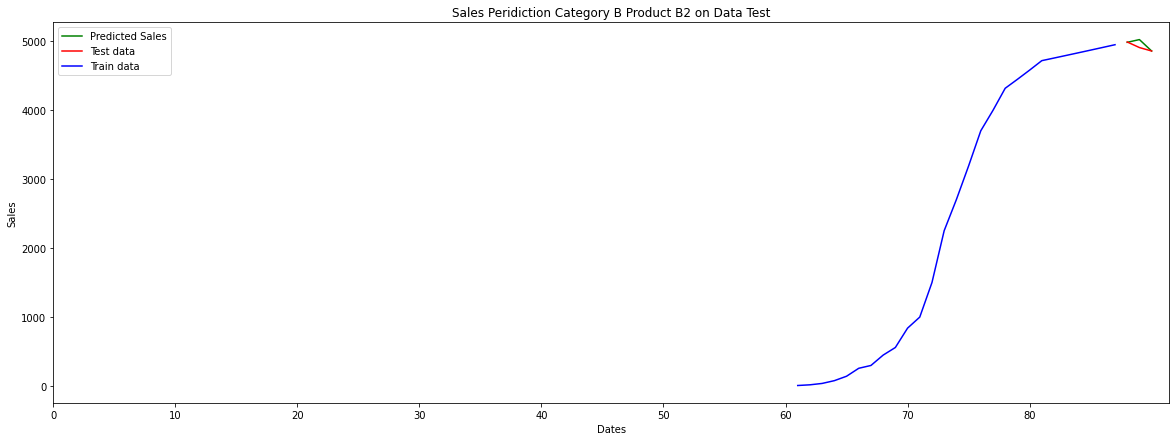

In [ ]:
# plottinng the result

plt.figure(figsize=(20,7))

plt.plot(testB2.index, predictions_B2, color='green', label='Predicted Sales')
plt.plot(testB2.index, testB2["Sales"], color='red', label='Test data')
plt.plot(trainB2.index, trainB2["Sales"], color='blue', label='Train data')
plt.title('Sales Peridiction Category B Product B2 on Data Test')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.xticks(np.arange(0,89,10))
plt.legend()

In [ ]:
# Convert the result into dataframe

actual_B2=pd.DataFrame()
actual_B2=pd.DataFrame(test_B2,columns=["Actual_B2"])
predicted_B2=pd.DataFrame(list(predictions_B2),columns=["Predicted_B2"])
actual_B2=actual_B2.reset_index(drop=True)
predicted_B2=predicted_B2.reset_index(drop=True)
output_B2=pd.concat([actual_B2,predicted_B2],axis=1)
output_B2

,Actual_B2,Predicted_B2
0,4980.657414,4975.580423
1,4900.000000,5015.421390
2,4850.000000,4850.071676


## Evaluation

Lets see the evaluation from this model 

### ARIMA

In [ ]:
# A1

MEAN_A1 = new_dataA1['Sales'].mean()
MAE_A1 = mean_absolute_error(output_A1['Actual_A1'], output_A1['Predicted_A1'])
MSE_A1 = mean_squared_error(output_A1['Actual_A1'], output_A1['Predicted_A1'])
RMSE_A1 = np.sqrt(mean_squared_error(output_A1['Actual_A1'], output_A1['Predicted_A1']))
MAPE_A1 = mean_absolute_percentage_error(output_A1['Actual_A1'], output_A1['Predicted_A1'])



In [ ]:
# A2

MEAN_A2 = new_dataA2['Sales'].mean()
MAE_A2 = mean_absolute_error(output_A2['Actual_A2'], output_A2['Predicted_A2'])
MSE_A2 = mean_squared_error(output_A2['Actual_A2'], output_A2['Predicted_A2'])
RMSE_A2 = np.sqrt(mean_squared_error(output_A2['Actual_A2'], output_A2['Predicted_A2']))
MAPE_A2 = mean_absolute_percentage_error(output_A2['Actual_A2'], output_A2['Predicted_A2'])

In [ ]:
# B1

MEAN_B1 = new_dataB1['Sales'].mean()
MAE_B1 = mean_absolute_error(output_B1['Actual_B1'], output_B1['Predicted_B1'])
MSE_B1 = mean_squared_error(output_B1['Actual_B1'], output_B1['Predicted_B1'])
RMSE_B1 = np.sqrt(mean_squared_error(output_B1['Actual_B1'], output_B1['Predicted_B1']))
MAPE_B1 = mean_absolute_percentage_error(output_B1['Actual_B1'], output_B1['Predicted_B1'])

In [ ]:
# B2

MEAN_B2 = new_dataB2['Sales'].mean()
MAE_B2 = mean_absolute_error(output_B2['Actual_B2'], output_B2['Predicted_B2'])
MSE_B2 = mean_squared_error(output_B2['Actual_B2'], output_B2['Predicted_B2'])
RMSE_B2 = np.sqrt(mean_squared_error(output_B2['Actual_B2'], output_B2['Predicted_B2']))
MAPE_B2 = mean_absolute_percentage_error(output_B2['Actual_B2'], output_B2['Predicted_B2'])

In [ ]:
predict = ['Sales A-A1','Sales A-A2','Sales B-B1','Sales B-B2']
score = pd.DataFrame(predict)
score.rename(columns={0:'Predict'},inplace = True)
score['MEAN']= (MEAN_A1,MEAN_A2,MEAN_B1,MEAN_B2)
score['MAE']= (MAE_A1,MAE_A2,MAE_B1,MAE_B2)
score['MSE']= (MSE_A1,MSE_A2,MSE_B1,MSE_B2)
score['RMSE']=(RMSE_A1,RMSE_A2, RMSE_B1, RMSE_B2)
score['MAPE']=(MAPE_A1,MAPE_A2, MAPE_B1, MAPE_B2)

score

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,Sales A-A1,150.819298,4.221801,46.518984,6.820483,0.020796
1,Sales A-A2,1265.010398,15.820438,463.939143,21.539247,0.010269
2,Sales B-B1,1063.055556,101.082280,28930.077081,170.088439,0.085441
3,Sales B-B2,2761.875726,40.190019,4449.292773,66.703019,0.008197


### HOLT-WINTERS

In [ ]:
MEAN_A1 = new_dataA1['Sales'].mean()
MAE_A1 = mean_absolute_error(testA1.Sales, y_hat_avg.Holt_Winter)
MSE_A1 = mean_squared_error(testA1.Sales, y_hat_avg.Holt_Winter)
RMSE_A1 = np.sqrt(mean_squared_error(testA1.Sales, y_hat_avg.Holt_Winter))
MAPE_A1 = mean_absolute_percentage_error(testA1.Sales, y_hat_avg.Holt_Winter)

MEAN_A2 = new_dataA2['Sales'].mean()
MAE_A2 = mean_absolute_error(testA2.Sales, y_hat_avg2.Holt_Winter)
MSE_A2 = mean_squared_error(testA2.Sales, y_hat_avg2.Holt_Winter)
RMSE_A2 = np.sqrt(mean_squared_error(testA2.Sales, y_hat_avg2.Holt_Winter))
MAPE_A2 = mean_absolute_percentage_error(testA2.Sales, y_hat_avg2.Holt_Winter)

MEAN_B1 = new_dataB1['Sales'].mean()
MAE_B1 = mean_absolute_error(testB1.Sales, y_hat_avg3.Holt_Winter)
MSE_B1 = mean_squared_error(testB1.Sales, y_hat_avg3.Holt_Winter)
RMSE_B1 = np.sqrt(mean_squared_error(testB1.Sales, y_hat_avg3.Holt_Winter))
MAPE_B1 = mean_absolute_percentage_error(testB1.Sales, y_hat_avg3.Holt_Winter)

MEAN_B2 = new_dataB2['Sales'].mean()
MAE_B2 = mean_absolute_error(testB2.Sales, y_hat_avg4.Holt_Winter)
MSE_B2 = mean_squared_error(testB2.Sales, y_hat_avg4.Holt_Winter)
RMSE_B2 = np.sqrt(mean_squared_error(testB2.Sales, y_hat_avg4.Holt_Winter))
MAPE_B2 = mean_absolute_percentage_error(testB2.Sales, y_hat_avg4.Holt_Winter)


In [ ]:
predict = ['Sales A-A1','Sales A-A2','Sales B-B1','Sales B-B2']
score2 = pd.DataFrame(predict)
score2.rename(columns={0:'Predict'},inplace = True)
score2['MEAN']= (MEAN_A1,MEAN_A2,MEAN_B1,MEAN_B2)
score2['MAE']= (MAE_A1,MAE_A2,MAE_B1,MAE_B2)
score2['MSE']= (MSE_A1,MSE_A2,MSE_B1,MSE_B2)
score2['RMSE']=(RMSE_A1,RMSE_A2, RMSE_B1, RMSE_B2)
score2['MAPE']=(MAPE_A1,MAPE_A2, MAPE_B1, MAPE_B2)

score2

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,Sales A-A1,150.819298,3.009153,13.382711,3.658239,0.014942
1,Sales A-A2,1265.010398,0.478108,0.334258,0.578151,0.000310
2,Sales B-B1,1063.055556,149.954529,44841.519605,211.758163,0.134086
3,Sales B-B2,2761.875726,32.789228,1461.440204,38.228788,0.006636


As we can see from the evaluation, Holt-Winters have less error than ARIMA. If we take a look from the MAE, RMSE, and MAPE score , in 3 categories A-A1, A-A2, B-B2 has small value, but for the B-B1 category has higher value. The MAPE result show that the error result below 1.5 % in every category. Which means the accuracy of prediction is 98.5 %. Overall Holt-Winters is prety good in result. We would like to use this model into forecasting. 

## FORECAST

Using Holt-Winters Model 

### A1 


In [ ]:
# Forecast for the next 14 day
forecast_A1 = fit1.predict(start = len(new_dataA1), 
                          end = (len(new_dataA1)-1) + 14 
                          )

In [ ]:
# convert into dataframe
day = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
result = pd.DataFrame(day)
result.rename(columns={0:'Day'},inplace = True)
result['Sales']= pd.DataFrame(forecast_A1)
forecast_A1 = result.set_index(['Day'])
forecast_A1

,Sales
Day,
1,208.542219
2,198.982268
3,200.139272
4,201.109503
5,202.199718
6,203.145307
7,205.131217
8,215.312111
9,205.441815


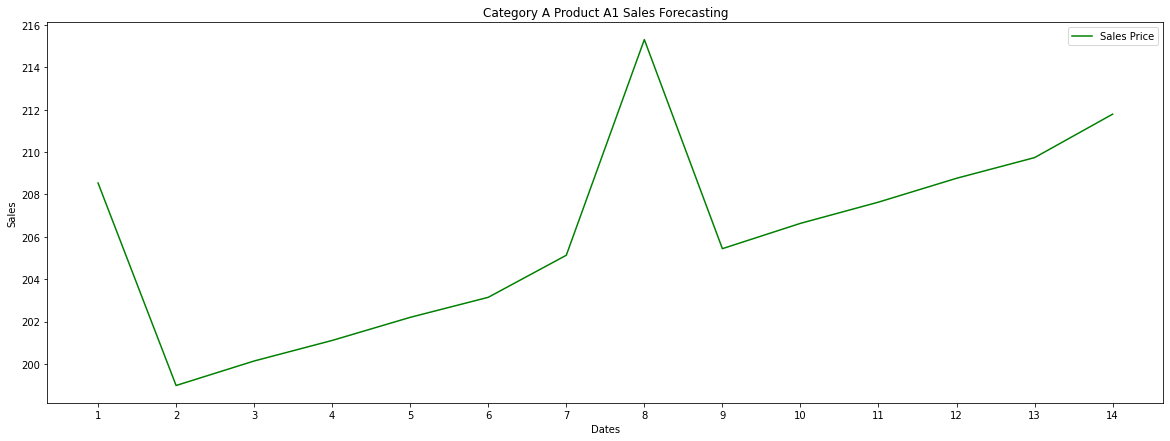

In [ ]:
# ploting the result 
plt.figure(figsize=(20,7))
plt.plot(forecast_A1, color='green', label='Sales Price')
plt.title('Category A Product A1 Sales Forecasting')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend()

Saving the dataframe for deployment requirements. 

In [ ]:
forecast_A1.to_csv('Forecast A1.csv')

### A2

In [ ]:
# Forecast for the next 14 day
forecast_A2 = fit2.predict(start = len(new_dataA2), 
                          end = (len(new_dataA2)-1) + 14 
                          )

In [ ]:
# convert result into dataframe
day = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
result = pd.DataFrame(day)
result.rename(columns={0:'Day'},inplace = True)
result['Sales']= pd.DataFrame(forecast_A2)
forecast_A2 = result.set_index(['Day'])
forecast_A2

,Sales
Day,
1,1614.239596
2,1573.832175
3,1581.701336
4,1589.609842
5,1597.276142
6,1605.262523
7,1613.288835
8,1671.297749
9,1629.462056


Saving dataframe result for deployment requirement. 

In [ ]:
forecast_A2.to_csv('Forecast A2.csv')

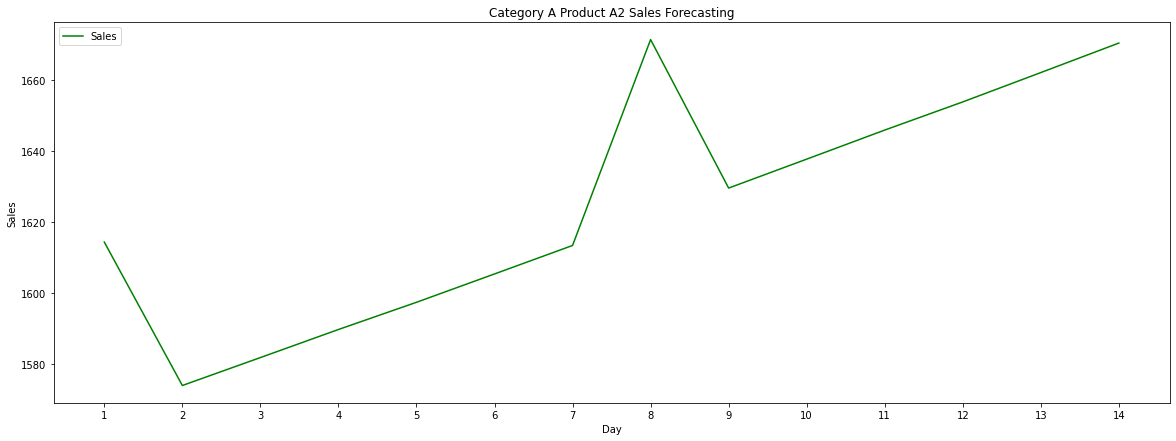

In [ ]:
# Plotting result 

plt.figure(figsize=(20,7))
plt.plot(forecast_A2, color='green', label='Sales')
plt.title('Category A Product A2 Sales Forecasting')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()

### B1

In [ ]:
# Forecast for the next 14 day
forecast_B1 = fit3.predict(start = len(new_dataB1), 
                          end = (len(new_dataB1)-1) + 14 
                          )


In [ ]:
day = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
result = pd.DataFrame(day)
result.rename(columns={0:'Day'},inplace = True)
result['Sales']= pd.DataFrame(forecast_B1)
forecast_B1 = result.set_index(['Day'])
forecast_B1

,Sales
Day,
1,1111.628206
2,1076.878383
3,987.246455
4,1034.405694
5,986.182822
6,1276.969023
7,974.730583
8,1111.303065
9,1076.563406


saving dataframe result for deployment requirement.

In [ ]:
forecast_B1.to_csv('Forecast B1.csv')

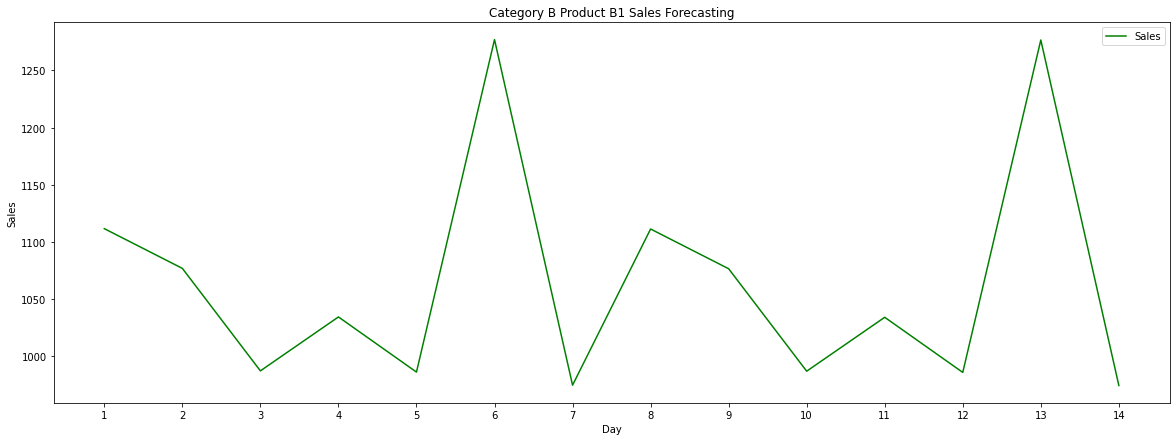

In [ ]:
# Ploting result 

plt.figure(figsize=(20,7))
plt.plot(forecast_B1, color='green', label='Sales')
plt.title('Category B Product B1 Sales Forecasting')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()

### B2

In [ ]:
# Forecast for the next 14 day
forecast_B2 = fit4.predict(start = len(new_dataB2), 
                          end = (len(new_dataB2)-1) + 14 
                          )

In [ ]:
day = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
result = pd.DataFrame(day)
result.rename(columns={0:'Day'},inplace = True)
result['Sales']= pd.DataFrame(forecast_B2)
forecast_B2 = result.set_index(['Day'])
forecast_B2

,Sales
Day,
1,4789.389865
2,4702.662991
3,4665.167233
4,4734.787083
5,4695.781253
6,4698.947647
7,4639.739753
8,4564.585743
9,4477.858869


Saving dataframe result for deployment requirement

In [ ]:
forecast_B2.to_csv('Forecast B2.csv')

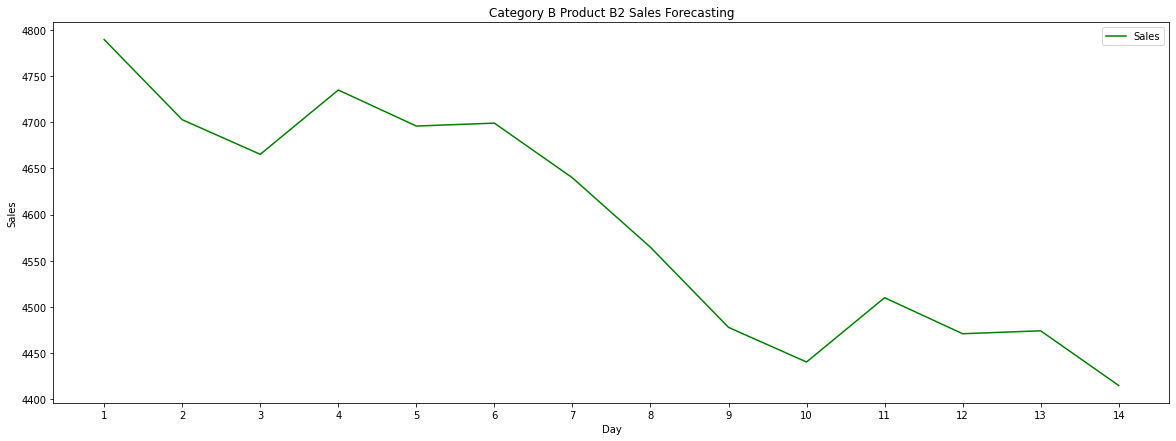

In [ ]:
# Ploting result 

plt.figure(figsize=(20,7))
plt.plot(forecast_B2, color='green', label='Sales')
plt.title('Category B Product B2 Sales Forecasting')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()

## Conclusion

- The forcasting model work pretty good in predict 14 days ahead in sales, I compare results from both algorithms which is Holt Winters and ARIMA and get different results. The Holt-Winters algorithm gives better results than the ARIMA in this cases. 
- The MAPE result show that the error result below 1.5 % in every category. Which means the accuracy of prediction is 98.5 %
- The Holt Winters is more accurate and it is easier to forecast. The Winters method is more accurate because it uses a smoother curve to predict future values.
- Holt Winter’s time series model is a very powerful prediction algorithm despite being one of the simplest models. It can handle the seasonality in the data set by just calculating the central value and then adding or multiplying it to the slope and seasonality.
- The limitation of this algorithm is the multiplicative feature of the seasonality. The issue of multiplicative seasonality is how the model performs when we have time frames with very low amounts.
- For the future improvement,  try to use another model and improve the parameters, minimize the error, also get the data more to perform long term prediction. 